In [1]:
# import python libraries

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

In [3]:
# import csv file
dataset=pd.read_csv(r"C:\Users\DELL\Downloads\diwali sales ananlysis python project\Python_Diwali_Sales_Analysis-main\Python_Diwali_Sales_Analysis-main\Diwali Sales Data.csv", encoding = "unicode_escape")

In [4]:
dataset.shape

(11251, 15)

In [5]:
dataset.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [7]:
#drop unrelated/blank columns
dataset.drop(['Status','unnamed1'],axis=1,inplace=True)

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


In [9]:
#check for null values
pd.isnull(dataset).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [10]:
# drop null values
dataset.dropna(inplace=True)

In [11]:
dataset.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [12]:
# change data type
dataset['Amount']=dataset['Amount'].astype('int')

In [13]:
dataset['Amount'].dtypes

dtype('int64')

In [14]:
#rename column
dataset.rename(columns={'Marital_Status':'Shaadi'})

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Shaadi,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206


In [15]:
# describe() method returns description of the data in the DataFrame (i.e. count, mean, std, etc)
dataset.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [16]:
dataset.describe(include='object')

,Cust_name,Product_ID,Gender,Age Group,State,Zone,Occupation,Product_Category
count,11239,11239,11239,11239,11239,11239,11239,11239
unique,1250,2350,2,7,16,5,15,18
top,Vishakha,P00265242,F,26-35,Uttar Pradesh,Central,IT Sector,Clothing & Apparel
freq,42,53,7832,4541,1944,4289,1583,2655


In [17]:
# use describe() for specific columns
dataset[['Age','Orders','Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


# Exploratory Data Analysis

### Gender

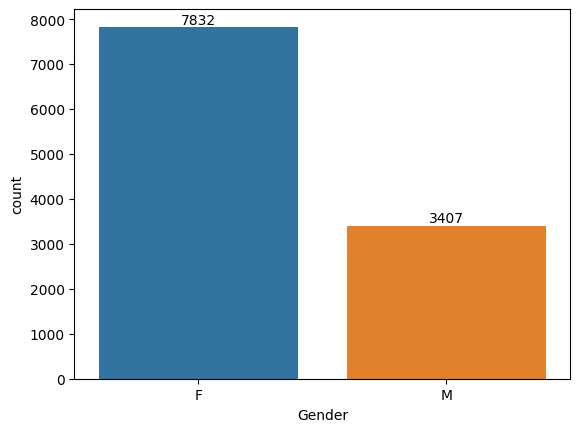

In [18]:
# plotting a bar chart for Gender and it's count
ax=sns.countplot(x='Gender',data=dataset,hue = 'Gender')

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Gender', ylabel='Amount'>

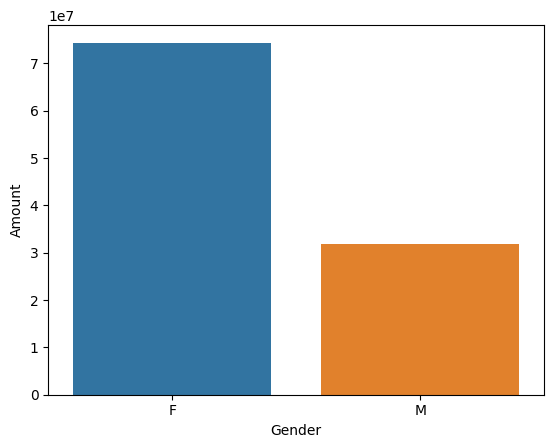

In [19]:
# plotting a bar chart for gender vs total amount
gp = dataset.groupby(["Gender"], as_index=False,)["Amount"].sum().sort_values(by="Amount",ascending=False)

sns.barplot(x = "Gender",y= "Amount" ,data = gp,hue='Gender')

*From above graphs we can see that most of the buyers are females and even the purchasing power of females are greater than men*

### Age

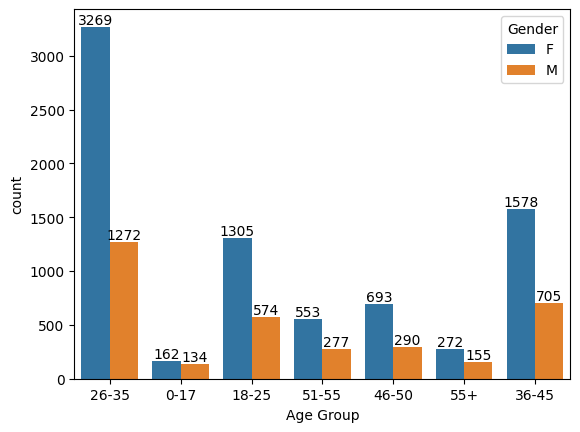

In [21]:
ax=sns.countplot(data=dataset, x='Age Group',hue = 'Gender')

for bars in ax.containers:
    ax.bar_label(bars)

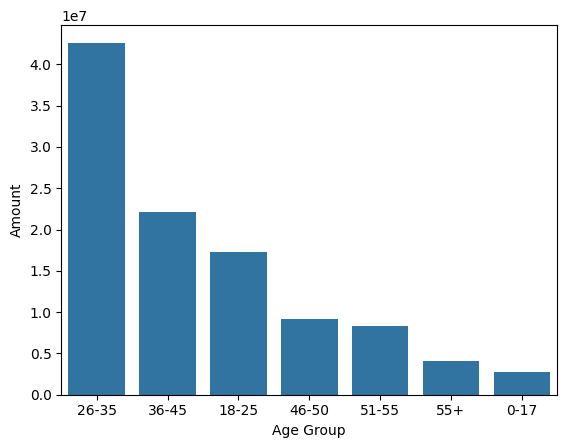

In [22]:
# Total Amount vs Age Group
gp=dataset.groupby(['Age Group'],as_index=False)['Amount'].sum().sort_values(by="Amount",ascending=False)

ax=sns.barplot(data=gp, x='Age Group', y='Amount')

*From above graphs we can see that most of the buyers are of age group between 26-35 yrs female*

### States

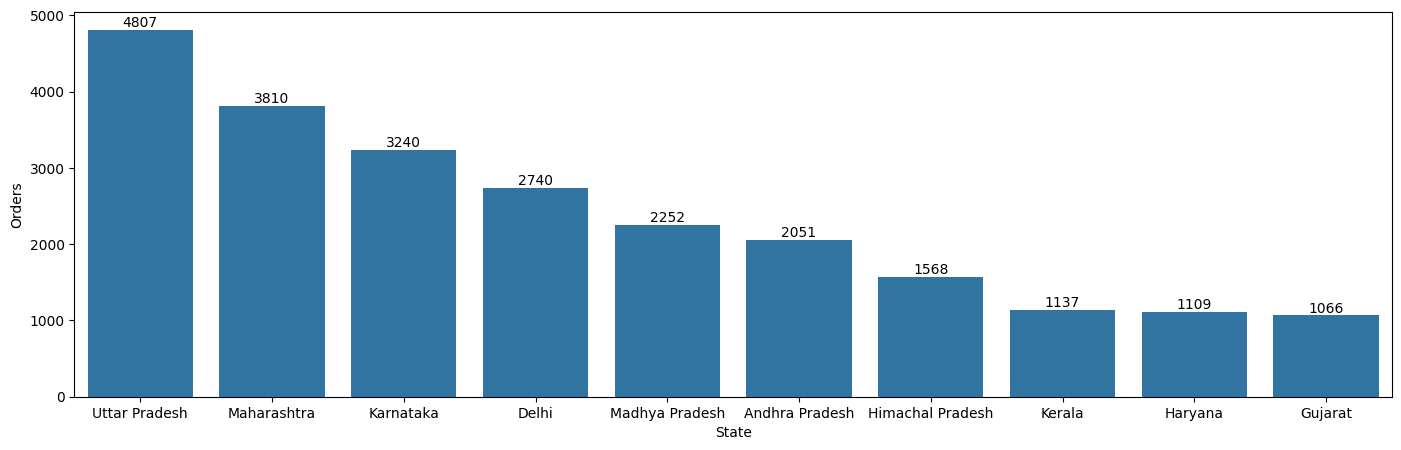

In [23]:
# total number of orders from top 10 states
gp=dataset.groupby(['State'],as_index=False)['Orders'].sum().sort_values(by="Orders",ascending=False).head(10)

plt.figure(figsize=(17,5))
ax=sns.barplot(data=gp, x='State', y='Orders')

for bars in ax.containers:
    ax.bar_label(bars)

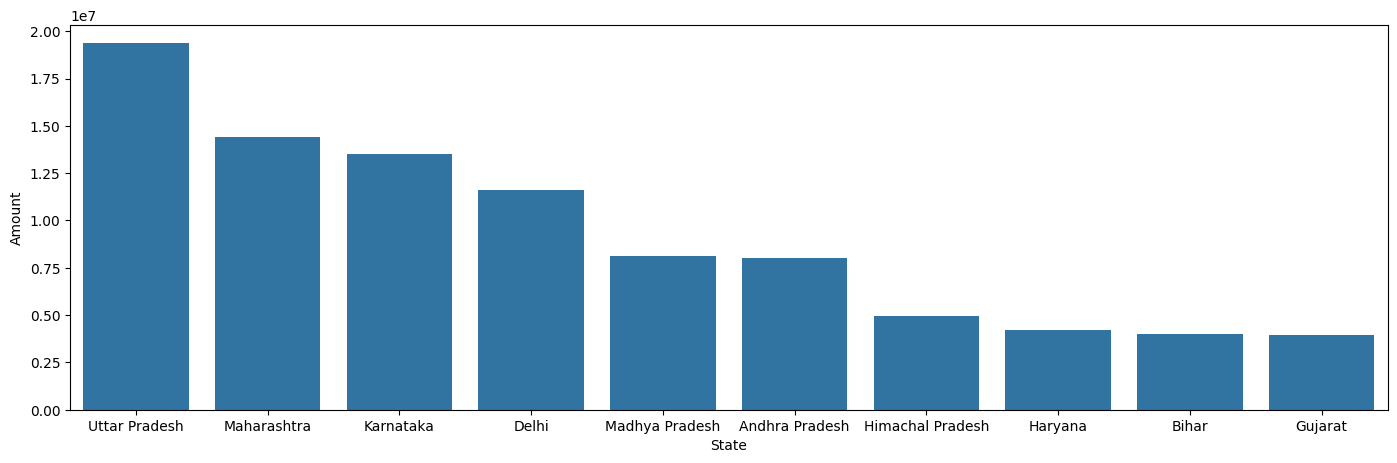

In [24]:
# total amount/sales from top 10 states
gp=dataset.groupby(['State'],as_index=False)['Amount'].sum().sort_values(by="Amount",ascending=False).head(10)

plt.figure(figsize=(17,5))
ax=sns.barplot(data=gp, x='State', y='Amount')

*From above graphs we can see that most of the orders & total sales/amount are from Uttar Pradesh, Maharashtra and Karnataka respectively*

### Marital_Status

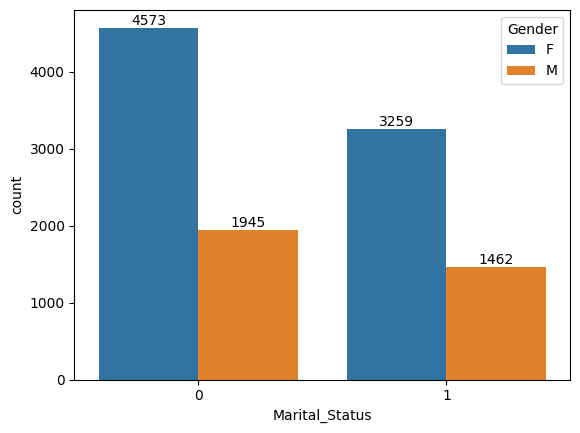

In [26]:
ax=sns.countplot(data=dataset, x='Marital_Status',hue='Gender')

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Marital_Status', ylabel='Amount'>

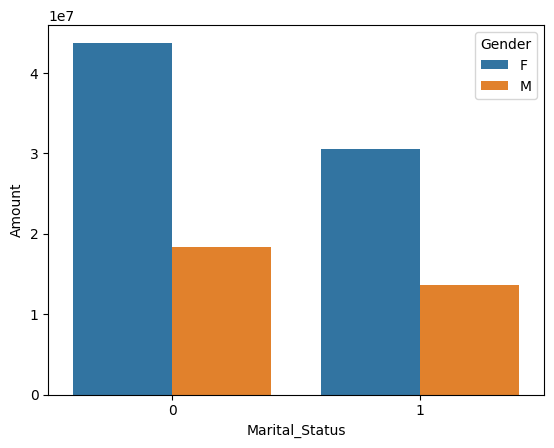

In [27]:
gp=dataset.groupby(['Marital_Status','Gender'],as_index=False)['Amount'].sum().sort_values(by="Amount",ascending=False)


sns.barplot(data = gp, x = 'Marital_Status',y= 'Amount', hue='Gender')

*From above graphs we can see that most of the buyers are married (women) and they have high purchasing power*

### Occupation

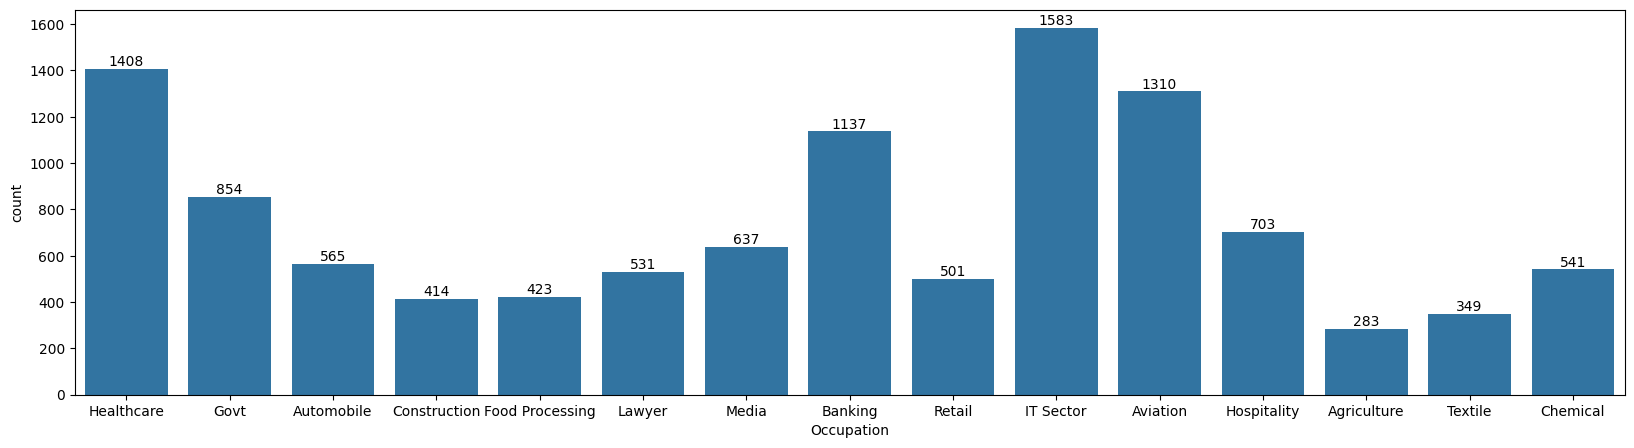

In [28]:
plt.figure(figsize=(20,5))
ax=sns.countplot(data=dataset,x='Occupation')

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Occupation', ylabel='Amount'>

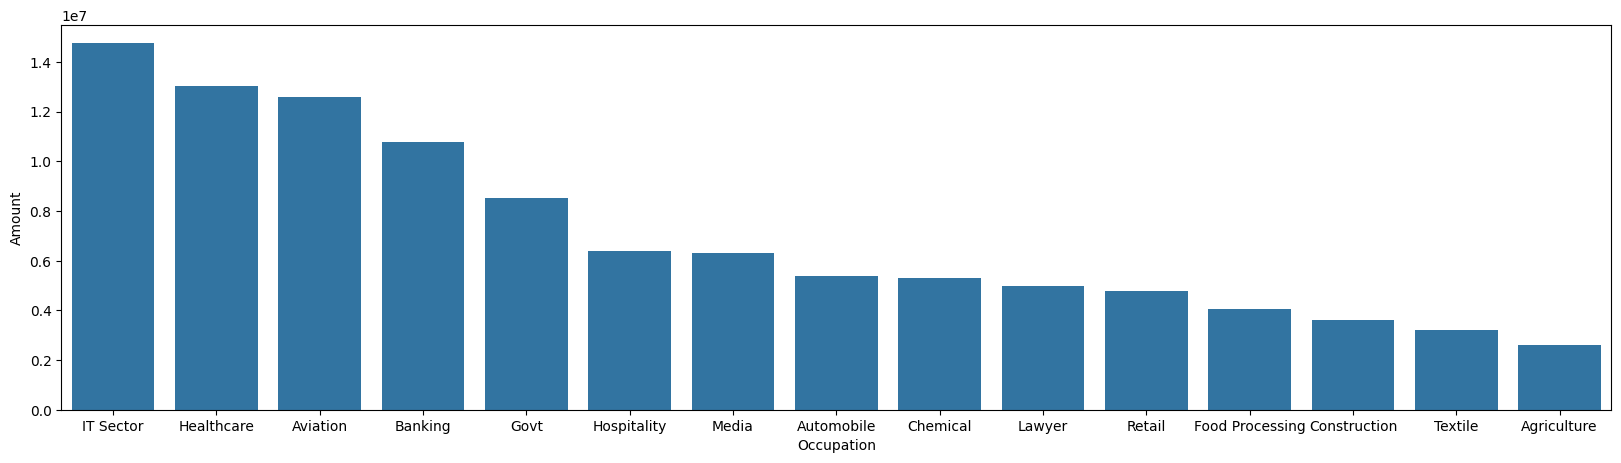

In [29]:
gp=dataset.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

plt.figure(figsize=(20,5))
sns.barplot(data=gp,x='Occupation',y='Amount')

*From above graphs we can see that most of the buyers are working in IT, Healthcare and Aviation sector*

### Products Category

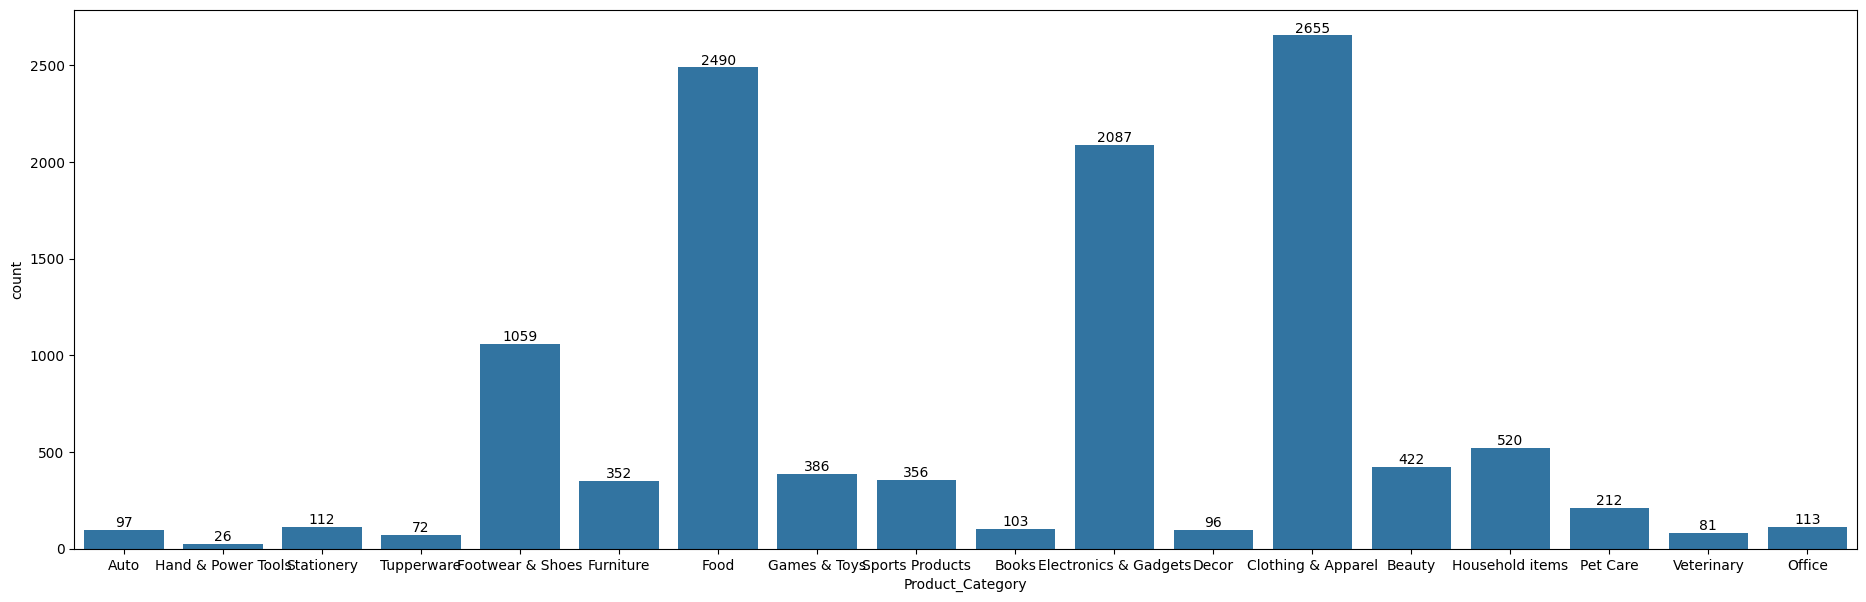

In [30]:
plt.figure(figsize=(23,7))
ax=sns.countplot(data=dataset,x='Product_Category')

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Product_Category', ylabel='Amount'>

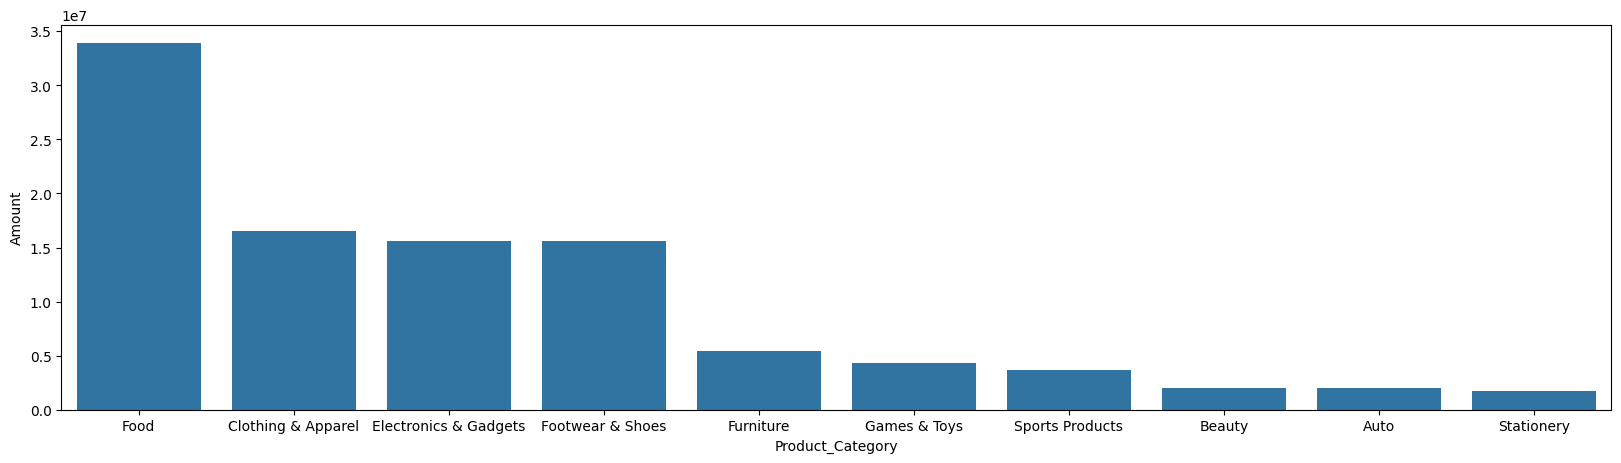

In [31]:
gp=dataset.groupby(['Product_Category'],as_index=False)['Amount'].sum().sort_values(by=['Amount'],ascending=False).head(10)

plt.figure(figsize=(20,5))
sns.barplot(data=gp,x='Product_Category',y='Amount')

*From above graphs we can see that most of the sold products are from Food, Clothing and Electronics category*

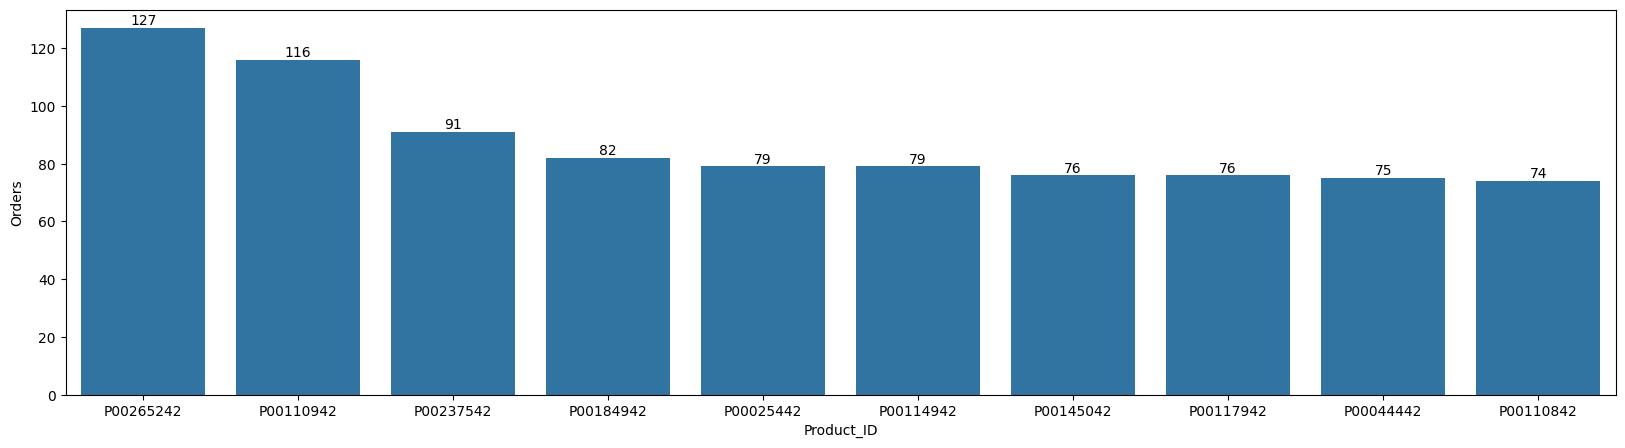

In [32]:
gp=dataset.groupby(['Product_ID'],as_index=False)['Orders'].sum().sort_values(by=['Orders'],ascending=False).head(10)

plt.figure(figsize=(20,5))
ax=sns.barplot(data=gp,x='Product_ID',y='Orders')

for bars in ax.containers:
    ax.bar_label(bars)

# Conclusion

### Married women age group 26-35 yrs from UP, Maharastra and Karnataka working in IT, Healthcare and Aviation are more likely to buy products from Food, Clothing and Electronics category

### Thank You